<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c3/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RandomForest

A continuación vamos a mostrar dos ejemplos sobre la utilización de la técnica denominada Random Forest (árboles aleatorios) mediante Python. 



*   El primer problema se desarrollará utilizando el tradicional datasset  iris, de forma que nos sirva para mostrar como aplicar esta técnica a problemas de clasificación.
*   El segundo ejemplo será un poco más complejo y consistirá en obtener predicciones continuas (regressión) en base a una serie de datos previamente conocidos.



# Random Forest aplicado a un problema de clasificación



En primer lugar cargamos el conjunto de datos

In [1]:
#Importamos scikit-learn dataset 
from sklearn import datasets

#cargamos datos
iris = datasets.load_iris()

Observemos algunos datos del dataset

In [17]:
# imprimimos los target
print(iris.target_names)

# imprimimos las features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
# Creamos un data frame de pandas con estos datos.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Creamos ahora los conjuntos de entrenamiento y de test

In [19]:
# Importamos train_test_split 
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset en datos entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Creamos ahora el clasificador empleando la clase `RandomForestClassifier`.

In [20]:
#Import Random Forest clasificador
from sklearn.ensemble import RandomForestClassifier
#creamos el bosque aleatorio
clf=RandomForestClassifier(n_estimators=100, n_jobs=-1)
#Realizamos el ajuste sobre los datos de entrenamiento
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Calculamos el accuracy del modelo.

In [21]:
#Importamos la clase metrics
from sklearn import metrics

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


A continuación procedemos a calcular la importancia de los atributos para el problema de clasificación y lo imprimimos por pantalla.

In [22]:
for name, importancia in zip(iris.feature_names,clf.feature_importances_):
    print(name, importancia)

sepal length (cm) 0.0730550605643397
sepal width (cm) 0.025271679234104456
petal length (cm) 0.46116241688488313
petal width (cm) 0.44051084331667273


Vemos que los atributos más importantes son *petal length (cm)* y *petal width (cm)*.

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicciones = clf.predict(X_test)
print("El accuracy del modelo es:")
print(accuracy_score(y_test,predicciones))
print("\n La matriz de confusión es: ")
confusion_matrix(y_test,predicciones)

El accuracy del modelo es:
0.9777777777777777

 La matriz de confusión es: 


array([[14,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 19]])

# Random Forest para un problema de regresión

En este apartado vamos a ver cómo utilizar `scikit-learn` para construir modelos que permitan predecir valores numéricos empleando la clase  `RandomForestRegressor`.

Los datos que utilizaremos se pueden descargar desde el siguiente enlace:
https://drive.google.com/file/d/1GhDbdvzXqkdGhHSdLNrPHn94bAD7UBmH/view

Aunque también podemos descargarlos directamente con el comando que viene a continuación.

##Opción descargar datos de Google Drive

In [2]:
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1GhDbdvzXqkdGhHSdLNrPHn94bAD7UBmH' -O 'temperaturas.csv'

--2023-02-20 09:25:03--  https://drive.google.com/uc?export=download&id=1GhDbdvzXqkdGhHSdLNrPHn94bAD7UBmH
Resolving drive.google.com (drive.google.com)... 172.253.115.100, 172.253.115.101, 172.253.115.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9qko545im9sbvtdjpgtu9leqfqdln9b6/1676885100000/14644984037434537262/*/1GhDbdvzXqkdGhHSdLNrPHn94bAD7UBmH?e=download&uuid=c82ef4ac-298f-4d83-bb2d-e0d975bdbcec [following]
--2023-02-20 09:25:04--  https://doc-0s-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9qko545im9sbvtdjpgtu9leqfqdln9b6/1676885100000/14644984037434537262/*/1GhDbdvzXqkdGhHSdLNrPHn94bAD7UBmH?e=download&uuid=c82ef4ac-298f-4d83-bb2d-e0d975bdbcec
Resolving doc-0s-b0-docs.googleusercontent.com (doc-0s-b0-docs.googleusercontent.com)... 142.251.16.132, 2

##Opción cargar los datos de manera manual



Descargamos los datos de [este enlace](https://drive.google.com/file/d/1GhDbdvzXqkdGhHSdLNrPHn94bAD7UBmH/view) a nuestro ordenador. Extraemos los ficheros correspondientes del archivo .zip descargado. Y subimos los ficheros .csv mediante la opción mostrada en la imagen.

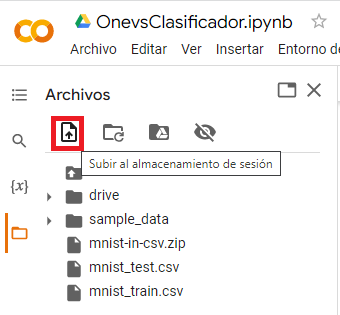

## Lectura y preparación de los datos

In [3]:
import pandas as pd
datos = pd.read_csv('temperaturas.csv')

In [4]:
# Leemos y sacamos algun dato
datos.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


Las variables contempladas son las siguientes:

* **year**: Todas observaciones tienen el valor 2016.

* **month**: número del mes

* **day**: numero del día del año

* **week**: día de la semana en letras.

* **temp_2**: temperatura máxima 2 días atrás.

* **temp_1**: temperatura máxima 1 día atrás.

* **average**: promedio histórico de temperatura máxima.

* **actual**: medición de temperatura máxima.

* **friend**: un número aleatorio, que está entre 20 por debajo la media y 20 por encima de esa media.

Borramos las columnas *forecast_noaa, forecast_acc, forecast_under*, pues no las utilizamos en este análisis.

In [5]:
datos.drop(['forecast_noaa', 'forecast_acc', 'forecast_under'], axis=1,inplace=True)

In [6]:
datos.shape

(348, 9)

In [7]:
# datos descriptivos del dataset
datos.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


Como vemos en este ejemplo, tenemos la variable *week* que es categórica, y para que pueda ser utilizada en este análisis debemos convertira a variable de tipo dummy (sólo puede tomar valores cero o uno). Para hacer este trabajo, pandas tiene implementado el método `get_dummies`, que lo que hace es convertir las variables categóricas en variable de tipo dummy. Veamos cómo hacemos esto.

In [8]:
datos = pd.get_dummies(datos)

In [9]:
datos.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


Si observamos, a pesar de haberle pasado todo el dataset copleto, la única variable que ha modificado `get_dummies` es la variable *week*.

Concretamente ha transformado esta variable en otras 7, que toman valores de cero o uno depenediendo del día de la semana. Ejemplo: si *week_Mon* es 1 indica que es lunes, mientras que para el resto de días de la semana tomará el valor de 0 y, algo parecido sucedería con el resto de la nuevas variables creadas.

Ahora preparamos los datos para el análisis. Vamos a utilizar `numpy`, para trabajar con arrays.

In [10]:
import numpy as np

# pasamos los target con los que trabajar
etiquetas = np.array(datos['actual'])

# Quitamos las etiquetas y nos quedamos con las features
# axis 1 se refiere a las columnas
features= datos.drop('actual', axis = 1)

# Creamos una lista con los nombres de las features
feature_list = list(features.columns)

#convertimos a un array
features = np.array(features)

## Entrenamiento del modelo

Creamos los conjuntos de train y test de forma que:


*   75% de las observaciones para train.
*   25% de las observaciones para test.



In [11]:
# Creamos train y test datos
from sklearn.model_selection import train_test_split

train_features, test_features, train_etiquetas, test_etiquetas =\
    train_test_split(features, etiquetas, test_size = 0.25, random_state = 42)

In [12]:
# Creamos ahora el modelo
from sklearn.ensemble import RandomForestRegressor

# Instanciamos el modelo con 1000 decision trees.
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


# Entrenamos el modelo con los datos de entrenamiento
rf.fit(train_features, train_etiquetas);

Ahora hacemos predicciones con el modelo y calculamos el error absoluto medio (MAE) para evaluar la bondad del ajuste del modelo entrenado.

La fórmula del MAE es la siguiente:

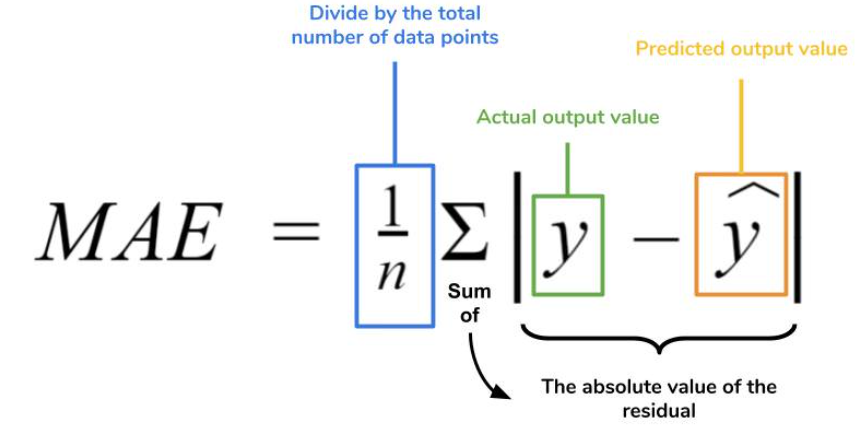

In [13]:
# Calculamos las predicciones para los datos de test
predictions = rf.predict(test_features)


# calculamos el valor absoluto de los errores
errors = abs(predictions - test_etiquetas)

# imprimimos el MAE obtenido
print('MAE (Mean absolute error):', round(np.mean(errors), 2))

MAE (Mean absolute error): 3.83


A continuación, calculamos el porcentaje de error absoluto (MAPE), y entonces una medida del accuracy del modelo  se puede calcular restando a 100 el porcentaje de error obtenido.

La fórmula del MAPE es la siguiente:

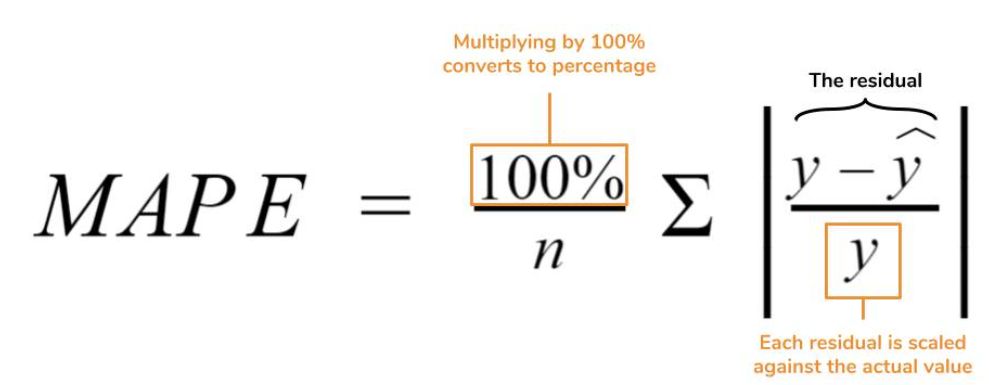




In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_etiquetas)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


En [este enlace](https://www.dataquest.io/blog/understanding-regression-error-metrics/) podéis encontrar un artículo interesante sobre las diferentes métricas para evaluar el error en un ajuste de regresión y su interpretación gráfica

### Feature importance

A continuación vamos a calcular la importancia de cada atributo para el modelo entrenado.

In [15]:
# obtenemos los valores numéricos de la feature importance
importances = list(rf.feature_importances_)

# Lista de tuplas con  variable e importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# ordenamos las features importnace
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Imprimimos los datos 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.69
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


Si representamos gráficamente el resultado anterior obtendríamos el siguiente gráfico.

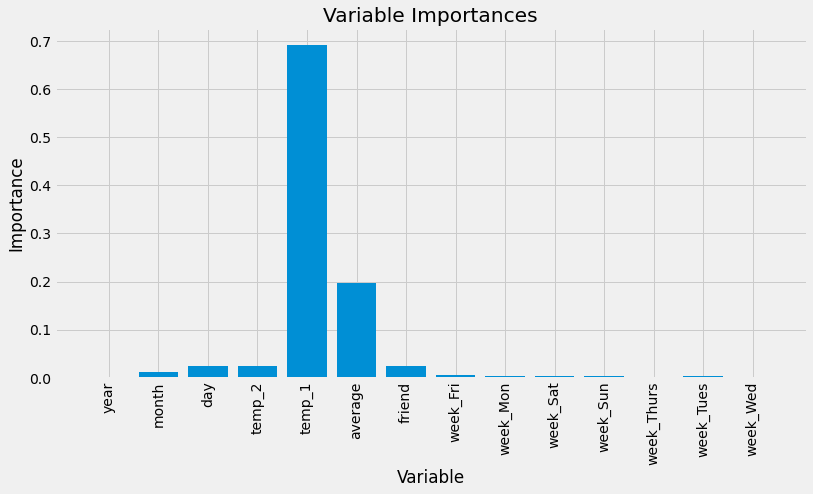

In [16]:
# Importamos matplotlb
import matplotlib.pyplot as plt
%matplotlib inline

# asignamos un estilo
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))

# Sacamos los valores de la x
x_values = list(range(len(importances)))


# Creamos el gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# ponemos etiquetas Tick en el eje de las x
plt.xticks(x_values, feature_list, rotation='vertical')

# personalizamos el eje y
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Esta información nos podría servir para simplificar las variables de entrada al modelo, eliminando aquellas variables con escasa o nula importancia. Reduciendo así el tiempo de entrenamiento (menor número de variables a evaluar) sin prácticamente impactar al rendimiento del modelo.

Además, esta información podríamos emplearla para otro modelo diferente. Por ejemplo, si queremos utilizar una máquina de vectores de soporte ([SVM](https://scikit-learn.org/stable/modules/svm.html)), podríamos usar la información sobre la importancia de los atributos que nos aporta Random Forest como una especie de método de selección de variables de entrada. 

A modo de ejemplo, implementemos rápidamente un bosque aleatorio con solo las dos variables más importantes, la temperatura máxima 1 día antes (*temp_1*) y el promedio histórico (*average*) y veamos cómo difiere el rendimiento con respecto al del ejemplo anterior.

In [ ]:
# Creamos un nuevo modelo solo con las dos variables más importantes.
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extraemos las dos variables más importante
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Entrenamos el modelo
rf_most_important.fit(train_important, train_etiquetas)

# Hacemos las predicciones
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_etiquetas)

# Mostramos lel accuracy
print('Mean Absolute Error (MAE):', round(np.mean(errors), 2), 'grados.')
mape = np.mean(100 * (errors / test_etiquetas))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2))

Mean Absolute Error (MAE): 3.92 grados.
Accuracy: 93.76


Vemos que el error cometido por el modelo es muy similar al del modelo con todas las variables.

# Ejercicios

1.   Utilizar la información de la importancia de los atributos del problema de clasificación para re-entrenar el modelo empleando solo las variables más relevantes. ¿Cómo afecta al rendimiento del modelo en este caso?
2.   Ejercicio extra: Implementar otro algoritmo distinto a Random Forest (RF) para el problema de regresión y comparar los resultados obtenidos empleando todas sus variables frente al resultado obtenido empleando solo las variables más importantes según RF.


Comentad los resultados en el foro del curso.

